# **Objectives**

The objective of this project is to analyze YouTube video data in order to uncover the key drivers of content performance and audience engagement. Specifically, the analysis seeks to:

1. Identify which video categories (e.g., Gaming, Comedy, News) receive the highest engagement in terms of views, likes, and comments.

2. Evaluate whether video duration or resolution influences engagement metrics.

3. Explore whether video popularity can be predicted using metadata features.

4. Assess whether videos with hashtags perform better than those without in terms of views, likes, and engagement rate.

5. Discover which hashtags are most frequently associated with viral videos and how they contribute to content success.

In [210]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [211]:
#applying whitegrid theme
sns.set(style="whitegrid")

In [212]:
#Loading Dataset
df=pd.read_csv('Youtube_data.csv')

In [213]:
#Checking total rows & columns
df.shape

(17589, 17)

In [214]:
#Viewing all the column names
df.columns

Index(['video_id', 'duration', 'bitrate', 'bitrate(video)', 'height', 'width',
       'frame rate', 'frame rate(est.)', 'codec', 'category', 'url', 'title',
       'description', 'hashtags', 'views', 'likes', 'comments'],
      dtype='object')

In [215]:
#Viewing partial dataset
df.head(10)

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1
6,-0bc_-HP6dE,43,634,501,480,360,29.97,29.97,h264,Entertainment,https://www.youtube.com/watch?v=-0bc_-HP6dE,VATOz N DA BARRIO,PREVIEW,NASTY!!!,138,0,0
7,-0hjSaYCRnA,4,738,605,540,360,29.97,0.00,h264,Comedy,https://www.youtube.com/watch?v=-0hjSaYCRnA,Shiiiiiiiiiiiit,Shiiiiiiiiiiiiiiiiiit,"shiiiiiiiiiiiiiiit, the, wire",373587,1204,54
8,-0kAY-vAVBc,228,5880,5686,1920,1080,25.00,25.00,h264,Music,https://www.youtube.com/watch?v=-0kAY-vAVBc,LAURA POTHIN . DANS MES VEINES BY SUNSHINE974PROD,"Extrait du maxi CD ""Dans mes veines"" de Laura ...","2013, La reunion, zouk love",1876,0,0
9,-0lNh-4ZuTE,268,492,364,640,360,25.00,0.00,h264,Education,https://www.youtube.com/watch?v=-0lNh-4ZuTE,Boonaa Mohammed - Killing with Love,Boonaa Mohammed - Killing with Love,NaN,50,1,0


In [216]:
#Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

In [217]:
#Checking Statistical info
df.describe()

,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),views,likes,comments
count,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,1.758900e+04,17589.000000,17589.000000
mean,241.551936,1271.354369,1150.418443,766.781170,504.591961,26.467639,9.471172,6.894158e+04,208.862641,12.899312
std,493.026994,1375.359875,1351.800202,467.289304,262.727746,6.039748,13.253197,3.537491e+06,8477.504735,225.839378
min,1.000000,0.000000,0.000000,108.000000,88.000000,3.750000,0.000000,0.000000e+00,0.000000,0.000000
25%,51.000000,437.000000,326.000000,426.000000,320.000000,25.000000,0.000000,3.800000e+01,0.000000,0.000000
50%,135.000000,743.000000,632.000000,640.000000,480.000000,29.970000,0.000000,1.520000e+02,1.000000,0.000000
75%,268.000000,1293.000000,1184.000000,960.000000,720.000000,29.970000,25.000000,8.000000e+02,4.000000,1.000000
max,25845.000000,22421.000000,22229.000000,2592.000000,1944.000000,59.080000,30.000000,4.103849e+08,836981.000000,16634.000000


In [218]:
#checking for Total null values
df.isnull().sum()

video_id               0
duration               0
bitrate                0
bitrate(video)         0
height                 0
width                  0
frame rate             0
frame rate(est.)       0
codec                  0
category               0
url                    0
title                  0
description         1112
hashtags            1576
views                  0
likes                  0
comments               0
dtype: int64

In [219]:
#Creating duplicate data
df1=df

# Data Cleaning

In [220]:
#Dropping Unnecessary columns
cols=['url', 'description']
df1.drop(cols, axis=1, inplace=True)

#Checking columns
df1.columns

Index(['video_id', 'duration', 'bitrate', 'bitrate(video)', 'height', 'width',
       'frame rate', 'frame rate(est.)', 'codec', 'category', 'title',
       'hashtags', 'views', 'likes', 'comments'],
      dtype='object')

In [221]:
#Renaming inconsistent column name & spacing
df1=df1.rename(columns={'frame rate':'frame_rate'})

df1=df1.rename(columns={'frame rate(est.)':'frame_rate_est'})

df1=df1.rename(columns={'bitrate(video)':'bitrate_video'})

In [222]:
#Handling missing values
df1['hashtags'].fillna('No Hashtags', inplace=True)

#Checking Null Values
df1.isna().sum()

video_id          0
duration          0
bitrate           0
bitrate_video     0
height            0
width             0
frame_rate        0
frame_rate_est    0
codec             0
category          0
title             0
hashtags          0
views             0
likes             0
comments          0
dtype: int64

In [223]:
#Checking for Duplicate rows
df1.duplicated().sum()

0

In [224]:
#Checking for Unique values
df1.duplicated('video_id').sum()

0

In [225]:
#Checking Unique values category
df1['category'].value_counts()

category
People & Blogs          3946
Music                   2966
Entertainment           2252
Gaming                  1420
Sports                  1230
Comedy                  1176
Autos & Vehicles         798
Education                644
News & Politics          636
Travel & Events          590
Film & Animation         587
Pets & Animals           476
Howto & Style            340
Science & Technology     283
Nonprofits & Activis     227
Shows                     18
Name: count, dtype: int64

In [226]:
#Fixing Data Inconsistencies
df1['category'] = df1['category'].str.strip().str.title()

In [227]:
# Checking negative values
print("Negative values check:")
print(df1[['views','likes','comments','duration','height','width']].lt(0).sum())

# Checking zero values
print("\nZero values check:")
print(df1[['views','likes','comments','duration','height','width']].eq(0).sum())

Negative values check:
views       0
likes       0
comments    0
duration    0
height      0
width       0
dtype: int64

Zero values check:
views         171
likes        7918
comments    12899
duration        0
height          0
width           0
dtype: int64


**Outlier detection & Treatment**

In [228]:
#Imputing IQR for views
def find_outliers(df1, views):
    Q1 = df1[views].quantile(0.25)   # 25th percentile
    Q3 = df1[views].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                   # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[views] < lower_limit) | (df1[views] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_views = find_outliers(df1, "views")
print("Outliers in views:", len(outliers_views))

print(df1["views"].describe())

Outliers in views: 2888
count    1.758900e+04
mean     6.894158e+04
std      3.537491e+06
min      0.000000e+00
25%      3.800000e+01
50%      1.520000e+02
75%      8.000000e+02
max      4.103849e+08
Name: views, dtype: float64


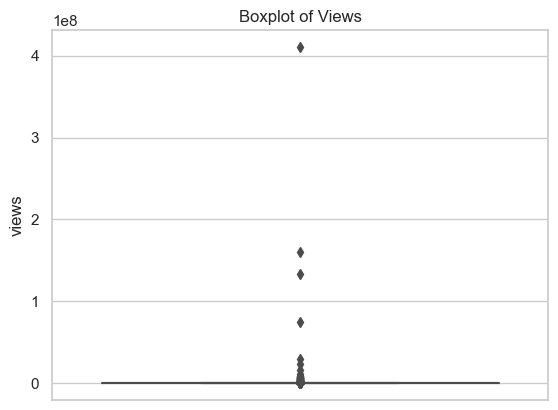

In [229]:
#Boxplot to view outliers
sns.boxplot(y=df1["views"])
plt.title("Boxplot of Views")
plt.show()

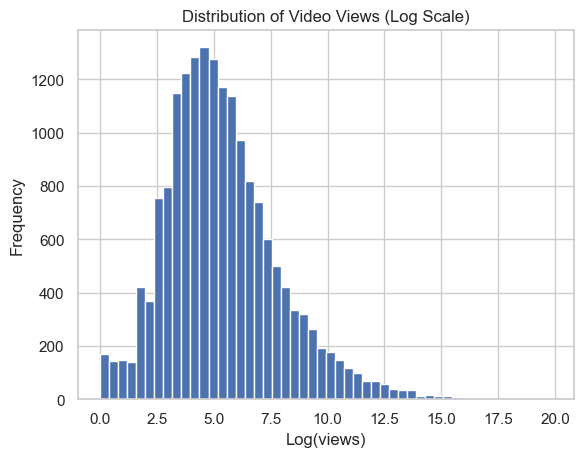

In [230]:
#Histogram using Log
plt.hist(np.log1p(df1["views"]), bins=50)
plt.xlabel("Log(views)")
plt.ylabel("Frequency")
plt.title("Distribution of Video Views (Log Scale)")
plt.show()

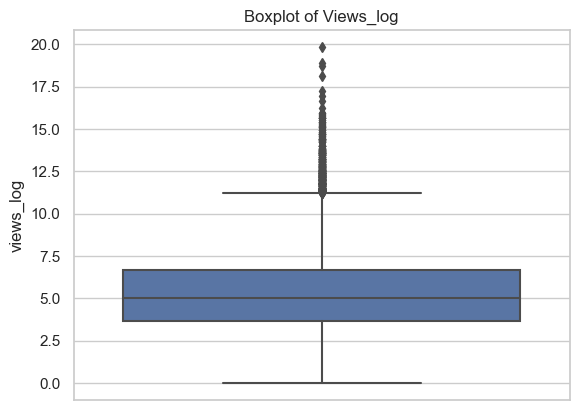

In [231]:
#Log transform
df1['views_log'] = np.log1p(df1['views'])

#Boxplot for viewing outliers
sns.boxplot(y=df1["views_log"])
plt.title("Boxplot of Views_log")
plt.show()

In [232]:
#Imputing IQR for Likes
def find_outliers(df1, likes):
    Q1 = df1[likes].quantile(0.25)   # 25th percentile
    Q3 = df1[likes].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[likes] < lower_limit) | (df1[likes] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_likes = find_outliers(df1, "likes")
print("Outliers in likes:", len(outliers_likes))

print(df1["likes"].describe())

Outliers in likes: 2565
count     17589.000000
mean        208.862641
std        8477.504735
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max      836981.000000
Name: likes, dtype: float64


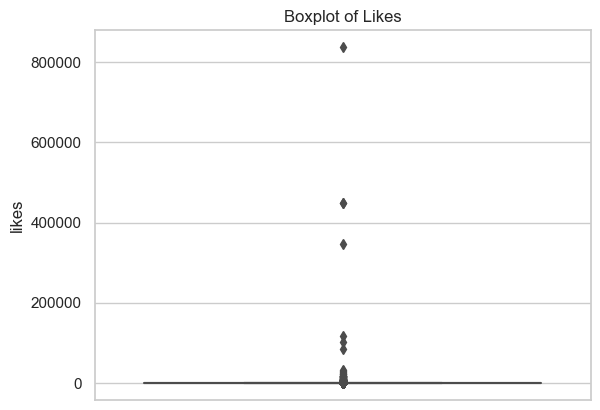

In [233]:
#Boxplot to view outliers
sns.boxplot(y=df1["likes"])
plt.title("Boxplot of Likes")
plt.show()

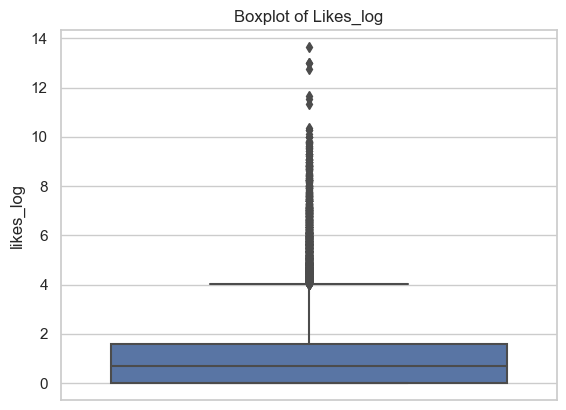

In [234]:
#Log Transform
df1['likes_log'] = np.log1p(df1['likes'])

#Boxplot to view outliers
sns.boxplot(y=df1["likes_log"])
plt.title("Boxplot of Likes_log")
plt.show()

In [235]:
#Imputing IQR
def find_outliers(df1, comments):
    Q1 = df1[comments].quantile(0.25)   # 25th percentile
    Q3 = df1[comments].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[comments] < lower_limit) | (df1[comments] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_comments = find_outliers(df1, "comments")
print("Outliers in comments:", len(outliers_comments))

print(df1["comments"].describe())

Outliers in comments: 2424
count    17589.000000
mean        12.899312
std        225.839378
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      16634.000000
Name: comments, dtype: float64


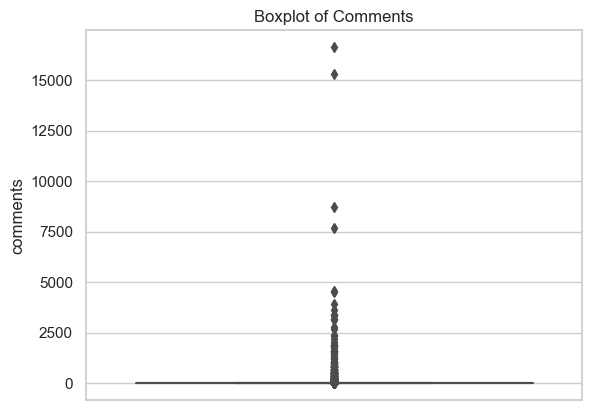

In [236]:
#Boxplot to view outliers
sns.boxplot(y=df1["comments"])
plt.title("Boxplot of Comments")
plt.show()

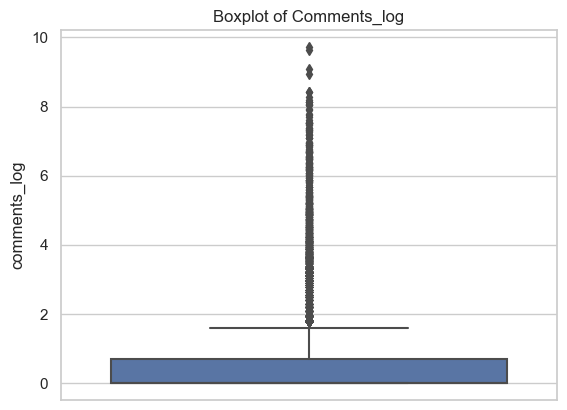

In [237]:
#Log Transform
df1['comments_log'] = np.log1p(df1['comments'])

#Boxplot to view outliers
sns.boxplot(y=df1["comments_log"])
plt.title("Boxplot of Comments_log")
plt.show()

In [238]:
#Imputing IQR for Duration
def find_outliers(df1, duration):
    Q1 = df1[duration].quantile(0.25)   # 25th percentile
    Q3 = df1[duration].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[duration] < lower_limit) | (df1[duration] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_duration = find_outliers(df1, "duration")
print("Outliers in duration:", len(outliers_duration))

print(df1["duration"].describe())

Outliers in duration: 1376
count    17589.000000
mean       241.551936
std        493.026994
min          1.000000
25%         51.000000
50%        135.000000
75%        268.000000
max      25845.000000
Name: duration, dtype: float64


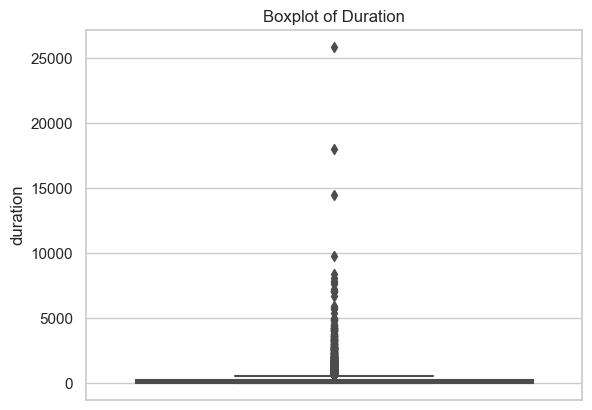

In [239]:
#Boxplot for viewing outliers
sns.boxplot(y=df1["duration"])
plt.title("Boxplot of Duration")
plt.show()

In [240]:
#Categoring to minutes
bins = [0, 240, 600, 1800, float('inf')]  # <4 min, 4–10 min, 10–30 min, >30 min
labels = ['Short (<4 min)', 'Medium (4–10 min)', 'Long (10–30 min)', 'Very Long (>30 min)']

#Creating duration categories
df1['duration_category'] = pd.cut(df1['duration'], bins=bins, labels=labels, right=False)

print(df1['duration_category'].value_counts())

duration_category
Short (<4 min)         12389
Medium (4–10 min)       3885
Long (10–30 min)        1116
Very Long (>30 min)      199
Name: count, dtype: int64


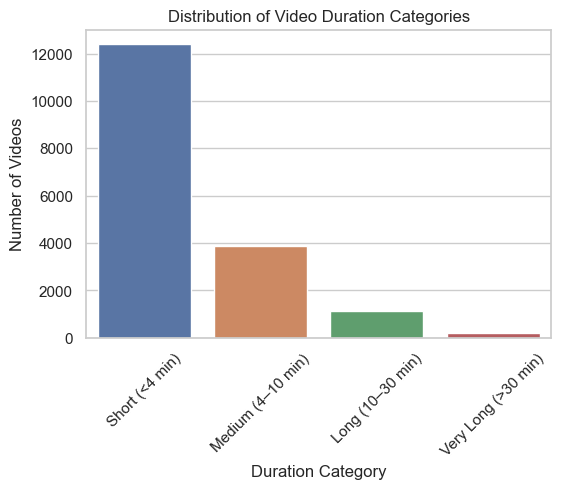

In [241]:
#Barchart for viewing duration category
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='duration_category', order=df1['duration_category'].value_counts().index)

plt.title("Distribution of Video Duration Categories")
plt.xlabel("Duration Category")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.show()

In [242]:
#Imputing IQR
def find_outliers(df1, bitrate):
    Q1 = df1[bitrate].quantile(0.25)   # 25th percentile
    Q3 = df1[bitrate].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[bitrate] < lower_limit) | (df1[bitrate] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_bitrate = find_outliers(df1, "bitrate")
print("Outliers in bitrate:", len(outliers_bitrate))

print(df1["bitrate"].describe())

Outliers in bitrate: 2671
count    17589.000000
mean      1271.354369
std       1375.359875
min          0.000000
25%        437.000000
50%        743.000000
75%       1293.000000
max      22421.000000
Name: bitrate, dtype: float64


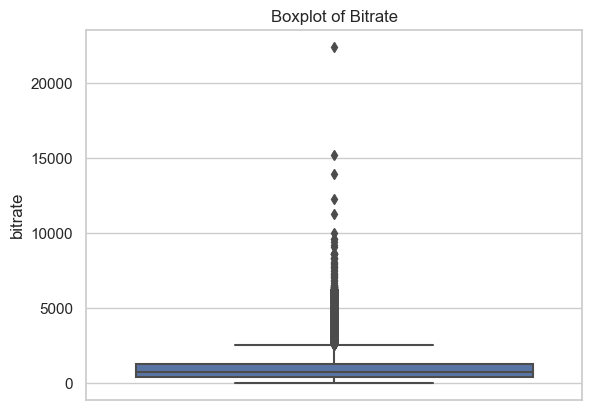

In [243]:
#Boxplot for viewing outliers
sns.boxplot(y=df1["bitrate"])
plt.title("Boxplot of Bitrate")
plt.show()

In [244]:
#Imputing IQR
def find_outliers(df1, bitrate_video):
    Q1 = df1[bitrate_video].quantile(0.25)   # 25th percentile
    Q3 = df1[bitrate_video].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[bitrate_video] < lower_limit) | (df1[bitrate_video] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_bitrate_video = find_outliers(df1, "bitrate_video")
print("Outliers in bitrate_video:", len(outliers_bitrate_video))

print(df1["bitrate_video"].describe())

Outliers in bitrate_video: 2597
count    17589.000000
mean      1150.418443
std       1351.800202
min          0.000000
25%        326.000000
50%        632.000000
75%       1184.000000
max      22229.000000
Name: bitrate_video, dtype: float64


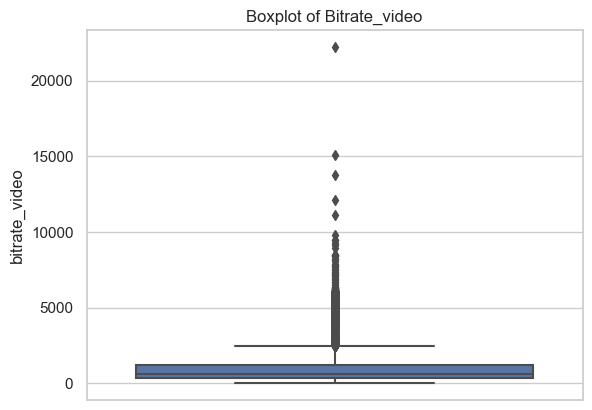

In [245]:
#Boxplot for viewing outliers
sns.boxplot(y=df1["bitrate_video"])
plt.title("Boxplot of Bitrate_video")
plt.show()

In [246]:
#Imputing IQR
def find_outliers(df1, frame_rate):
    Q1 = df1[frame_rate].quantile(0.25)   # 25th percentile
    Q3 = df1[frame_rate].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[frame_rate] < lower_limit) | (df1[frame_rate] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_frame_rate = find_outliers(df1, "frame_rate")
print("Outliers in frame_rate:", len(outliers_frame_rate))

print(df1["frame_rate"].describe())

Outliers in frame_rate: 2287
count    17589.000000
mean        26.467639
std          6.039748
min          3.750000
25%         25.000000
50%         29.970000
75%         29.970000
max         59.080000
Name: frame_rate, dtype: float64


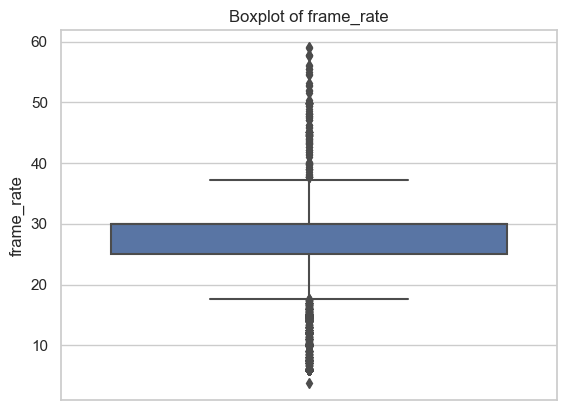

In [247]:
#Boxplot for viewing outliers
sns.boxplot(y=df1["frame_rate"])
plt.title("Boxplot of frame_rate")
plt.show()

In [248]:
#Imputing IQR
def find_outliers(df1, frame_rate_est):
    Q1 = df1[frame_rate_est].quantile(0.25)   # 25th percentile
    Q3 = df1[frame_rate_est].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df1[(df1[frame_rate_est] < lower_limit) | (df1[frame_rate_est] > upper_limit)]
    
    return outliers

#Checking for outliers
outliers_frame_rate_est = find_outliers(df1, "frame_rate_est")
print("Outliers in frame_rate_est:", len(outliers_frame_rate_est))

print(df1["frame_rate_est"].describe())

Outliers in frame_rate_est: 0
count    17589.000000
mean         9.471172
std         13.253197
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max         30.000000
Name: frame_rate_est, dtype: float64


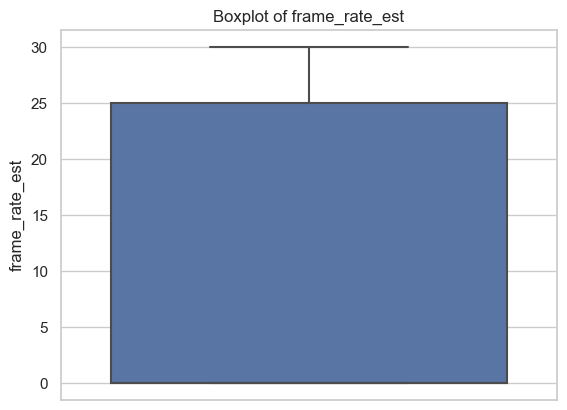

In [249]:
#Boxplot for viewing outliers
sns.boxplot(y=df1["frame_rate_est"])
plt.title("Boxplot of frame_rate_est")
plt.show()

In [250]:
#Checking for log transformation columns
df1.head()

,video_id,duration,bitrate,bitrate_video,height,width,frame_rate,frame_rate_est,codec,category,title,hashtags,views,likes,comments,views_log,likes_log,comments_log,duration_category
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,«السودان ينتفض» أمام السفارة بالقاهرة,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,8.313607,3.737670,1.386294,Short (<4 min)
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,Pokemon Tower Defense Episodio 2,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1,3.526361,1.098612,0.693147,Long (10–30 min)
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,New Hip Hop - Kemo Treats - Pancakes,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,9.490091,4.912655,2.890372,Short (<4 min)
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,Sister's Keeper Impression,"natural hair, first impression, sister's keepe...",43,1,0,3.784190,0.693147,0.000000,Medium (4–10 min)
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,5.407172,1.098612,0.000000,Medium (4–10 min)


**Feature Engineering**

In [251]:
#Adding column Engagement rate
df1['engagement_rate'] = np.where(df1['views'] > 0,(df1['likes'] + df1['comments']) / df1['views'], 0)

#Filling null values to 0 (171 rows contain 0 views)
df1['engagement_rate'] = df1['engagement_rate'].fillna(0)

In [252]:
#Categorizing & Adding Resolution column
def map_resolution(h):
    if h <= 240:
        return "240p"
    elif h <= 360:
        return "360p"
    elif h <= 480:
        return "480p"
    elif h <= 720:
        return "720p (HD)"
    elif h <= 1080:
        return "1080p (Full HD)"
    elif h <= 2160:
        return "2160p (4K)"
    else:
        return "Other"

df1['resolution'] = df1['height'].apply(map_resolution)

# Checking distribution
print(df1['resolution'].value_counts())

resolution
720p (HD)          6155
2160p (4K)         4301
360p               3303
480p               1784
1080p (Full HD)    1277
240p                766
Other                 3
Name: count, dtype: int64


In [253]:
#Adding Column to minutes
df1["duration_min"] = df1["duration"] / 60

In [254]:
#Adding Column 
df1["likes_per_min"] = np.where(df1["duration_min"] > 0, df1["likes"] / df1["duration_min"], 0)

In [255]:
#Adding Column 
df1["views_per_min"] = np.where(df1["duration_min"] > 0, df1["views"] / df1["duration_min"], 0)

In [256]:
#binary flag for hashtags
df1['has_hashtags'] = df1['hashtags'].notna().astype(int)

In [257]:
# Define viral threshold (top 5% by views)
viral_threshold = df1['views'].quantile(0.95)
df1['is_viral'] = (df1['views'] >= viral_threshold).astype(int)

In [258]:
#Checking Dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   video_id           17589 non-null  object  
 1   duration           17589 non-null  int64   
 2   bitrate            17589 non-null  int64   
 3   bitrate_video      17589 non-null  int64   
 4   height             17589 non-null  int64   
 5   width              17589 non-null  int64   
 6   frame_rate         17589 non-null  float64 
 7   frame_rate_est     17589 non-null  float64 
 8   codec              17589 non-null  object  
 9   category           17589 non-null  object  
 10  title              17589 non-null  object  
 11  hashtags           17589 non-null  object  
 12  views              17589 non-null  int64   
 13  likes              17589 non-null  int64   
 14  comments           17589 non-null  int64   
 15  views_log          17589 non-null  float64 
 16  like

In [259]:
#Checking for Null values
df1.isna().sum()

video_id             0
duration             0
bitrate              0
bitrate_video        0
height               0
width                0
frame_rate           0
frame_rate_est       0
codec                0
category             0
title                0
hashtags             0
views                0
likes                0
comments             0
views_log            0
likes_log            0
comments_log         0
duration_category    0
engagement_rate      0
resolution           0
duration_min         0
likes_per_min        0
views_per_min        0
has_hashtags         0
is_viral             0
dtype: int64

In [260]:
df.to_csv('cleaned_youtube_dataset.csv', index=False)

# EDA(Exploratory Data Analysis)

In [261]:
#Viewing dataset for Analysis
df1.head(5)

,video_id,duration,bitrate,bitrate_video,height,width,frame_rate,frame_rate_est,codec,category,...,likes_log,comments_log,duration_category,engagement_rate,resolution,duration_min,likes_per_min,views_per_min,has_hashtags,is_viral
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,...,3.737670,1.386294,Short (<4 min),0.010790,2160p (4K),3.000000,13.666667,1359.333333,1,0
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,...,1.098612,0.693147,Long (10–30 min),0.090909,2160p (4K),15.500000,0.129032,2.129032,1,0
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,...,4.912655,2.890372,Short (<4 min),0.011492,2160p (4K),3.883333,34.763948,3406.094421,1,0
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,...,0.693147,0.000000,Medium (4–10 min),0.023256,360p,9.366667,0.106762,4.590747,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,...,1.098612,0.000000,Medium (4–10 min),0.009009,2160p (4K),5.000000,0.400000,44.400000,1,0


In [262]:
#Checking dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   video_id           17589 non-null  object  
 1   duration           17589 non-null  int64   
 2   bitrate            17589 non-null  int64   
 3   bitrate_video      17589 non-null  int64   
 4   height             17589 non-null  int64   
 5   width              17589 non-null  int64   
 6   frame_rate         17589 non-null  float64 
 7   frame_rate_est     17589 non-null  float64 
 8   codec              17589 non-null  object  
 9   category           17589 non-null  object  
 10  title              17589 non-null  object  
 11  hashtags           17589 non-null  object  
 12  views              17589 non-null  int64   
 13  likes              17589 non-null  int64   
 14  comments           17589 non-null  int64   
 15  views_log          17589 non-null  float64 
 16  like

In [263]:
#Checking Statistical details
df1.describe()

,duration,bitrate,bitrate_video,height,width,frame_rate,frame_rate_est,views,likes,comments,views_log,likes_log,comments_log,engagement_rate,duration_min,likes_per_min,views_per_min,has_hashtags,is_viral
count,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,1.758900e+04,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,1.758900e+04,17589.0,17589.000000
mean,241.551936,1271.354369,1150.418443,766.781170,504.591961,26.467639,9.471172,6.894158e+04,208.862641,12.899312,5.347548,1.104689,0.469624,0.010913,4.025866,69.240358,2.563528e+04,1.0,0.050031
std,493.026994,1375.359875,1351.800202,467.289304,262.727746,6.039748,13.253197,3.537491e+06,8477.504735,225.839378,2.474769,1.572576,1.045349,0.047003,8.217117,2663.527605,1.262997e+06,0.0,0.218016
min,1.000000,0.000000,0.000000,108.000000,88.000000,3.750000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000e+00,1.0,0.000000
25%,51.000000,437.000000,326.000000,426.000000,320.000000,25.000000,0.000000,3.800000e+01,0.000000,0.000000,3.663562,0.000000,0.000000,0.000000,0.850000,0.000000,2.000000e+01,1.0,0.000000
50%,135.000000,743.000000,632.000000,640.000000,480.000000,29.970000,0.000000,1.520000e+02,1.000000,0.000000,5.030438,0.693147,0.000000,0.002095,2.250000,0.217654,8.470588e+01,1.0,0.000000
75%,268.000000,1293.000000,1184.000000,960.000000,720.000000,29.970000,25.000000,8.000000e+02,4.000000,1.000000,6.685861,1.609438,0.693147,0.009901,4.466667,1.935484,4.416000e+02,1.0,0.000000
max,25845.000000,22421.000000,22229.000000,2592.000000,1944.000000,59.080000,30.000000,4.103849e+08,836981.000000,16634.000000,19.832606,13.637558,9.719264,4.760000,430.750000,254547.000000,1.548622e+08,1.0,1.000000


**Univariate Analysis**

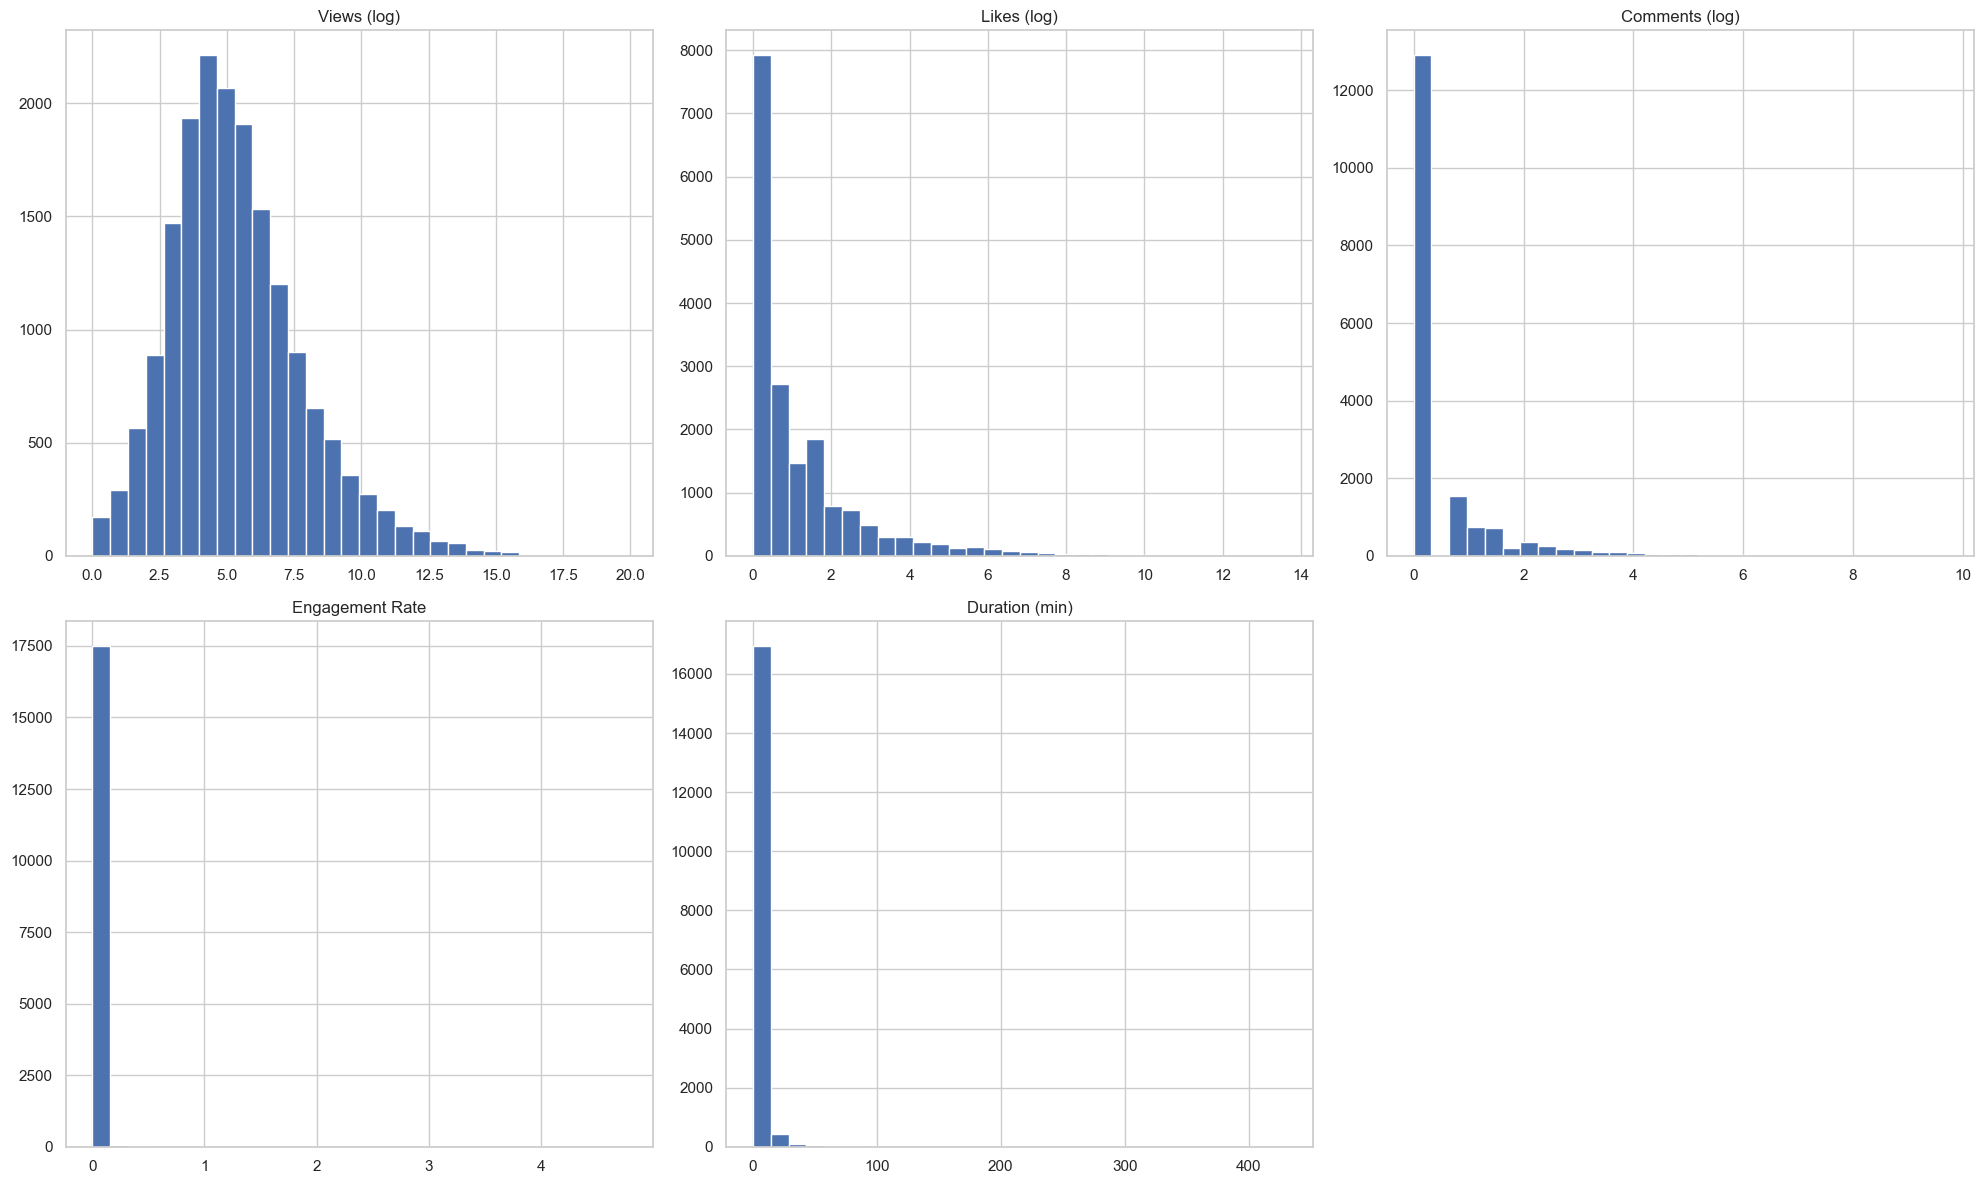

In [264]:
#List of numeric columns
num_cols = ['views_log', 'likes_log', 'comments_log', 'engagement_rate', 'duration_min']

#Histograms for numerical features
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
plt.hist(df1['views_log'], bins=30)
plt.title("Views (log)")

plt.subplot(2,3,2)
plt.hist(df1['likes_log'], bins=30)
plt.title("Likes (log)")

plt.subplot(2,3,3)
plt.hist(df1['comments_log'], bins=30)
plt.title("Comments (log)")

plt.subplot(2,3,4)
plt.hist(df1['engagement_rate'], bins=30)
plt.title("Engagement Rate")

plt.subplot(2,3,5)
plt.hist(df1['duration_min'], bins=30)
plt.title("Duration (min)")

plt.tight_layout()
plt.show()

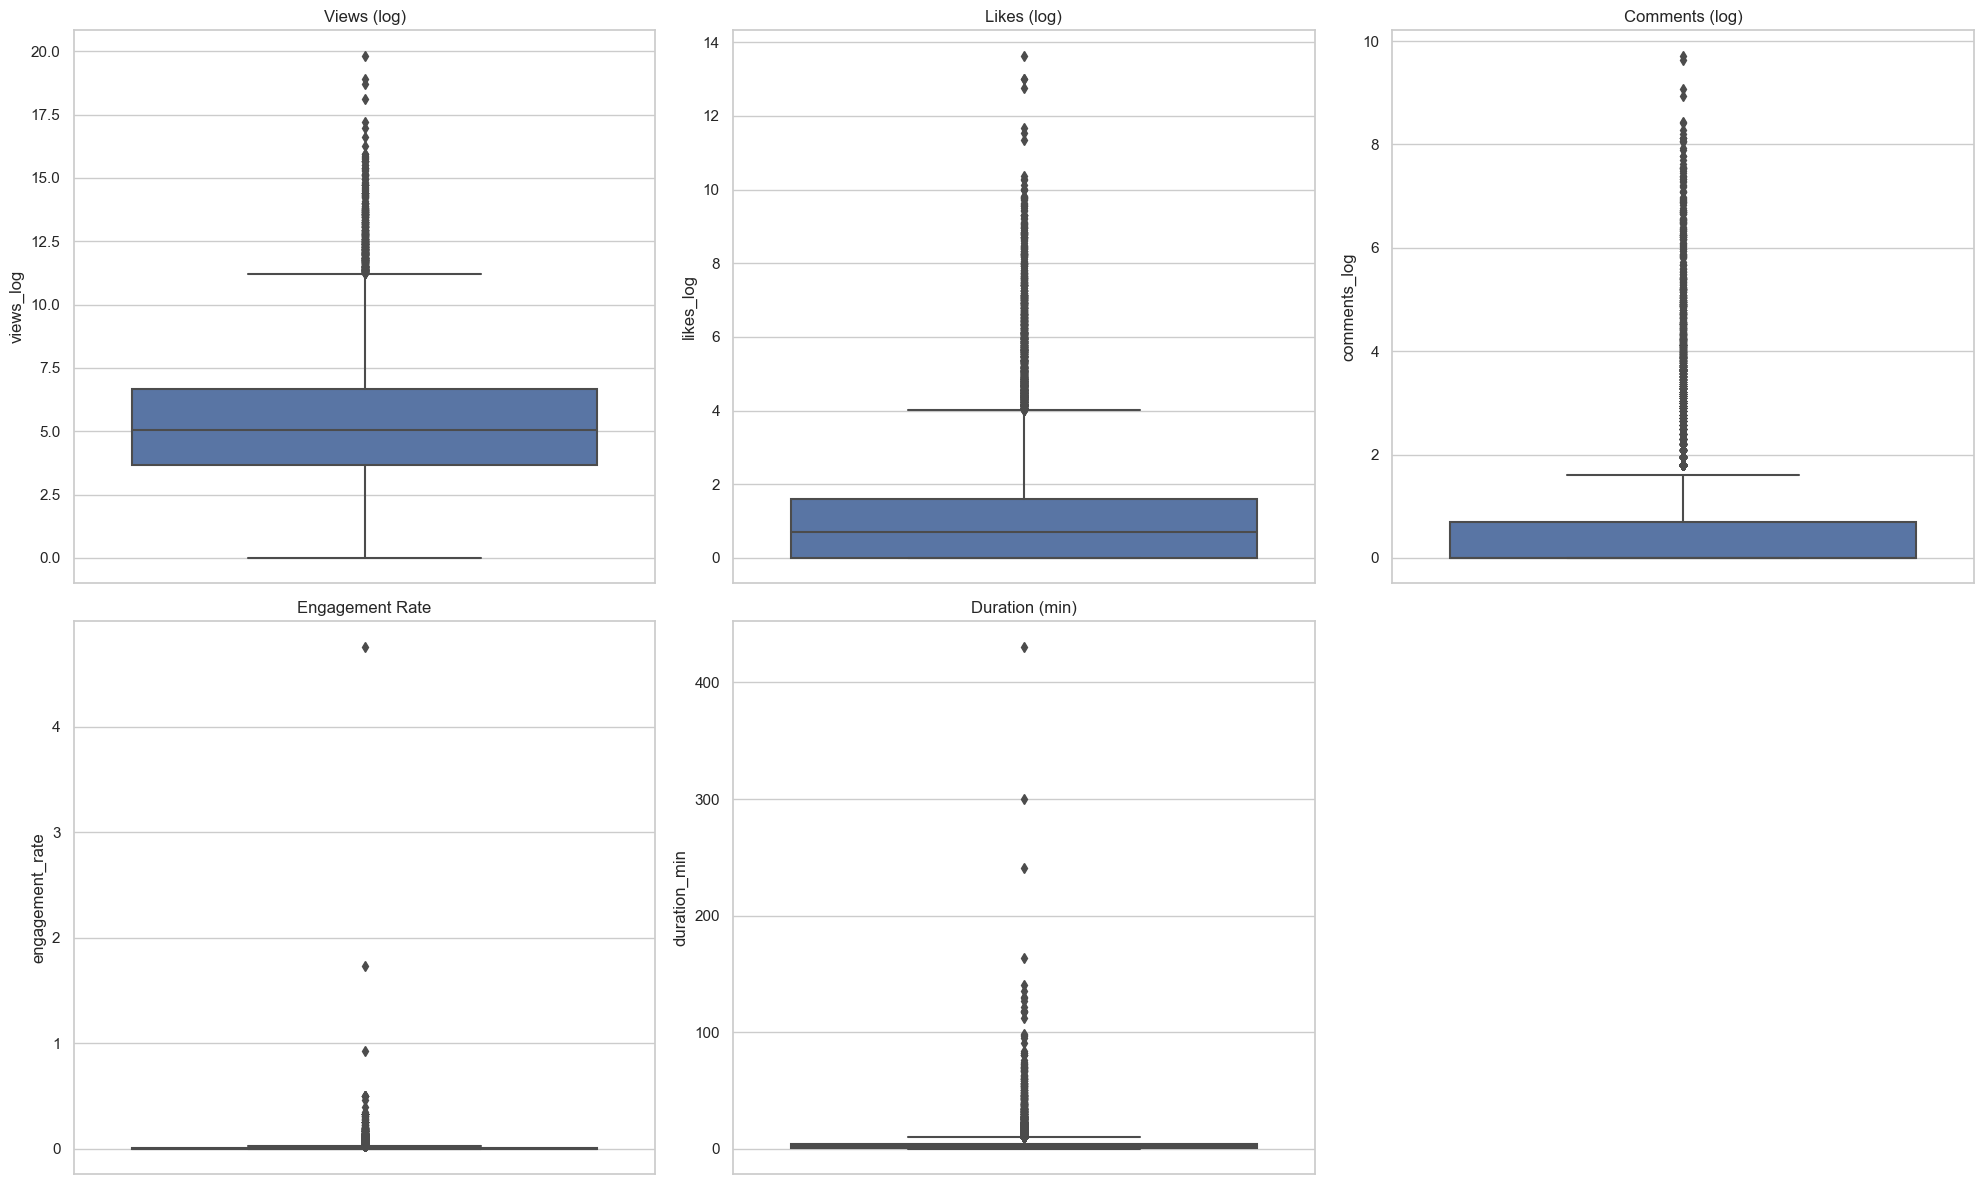

In [265]:
#Boxplots for numerical features
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(y=df1['views_log'])
plt.title("Views (log)")

plt.subplot(2,3,2)
sns.boxplot(y=df1['likes_log'])
plt.title("Likes (log)")

plt.subplot(2,3,3)
sns.boxplot(y=df1['comments_log'])
plt.title("Comments (log)")

plt.subplot(2,3,4)
sns.boxplot(y=df1['engagement_rate'])
plt.title("Engagement Rate")

plt.subplot(2,3,5)
sns.boxplot(y=df1['duration_min'])
plt.title("Duration (min)")

plt.tight_layout()
plt.show()

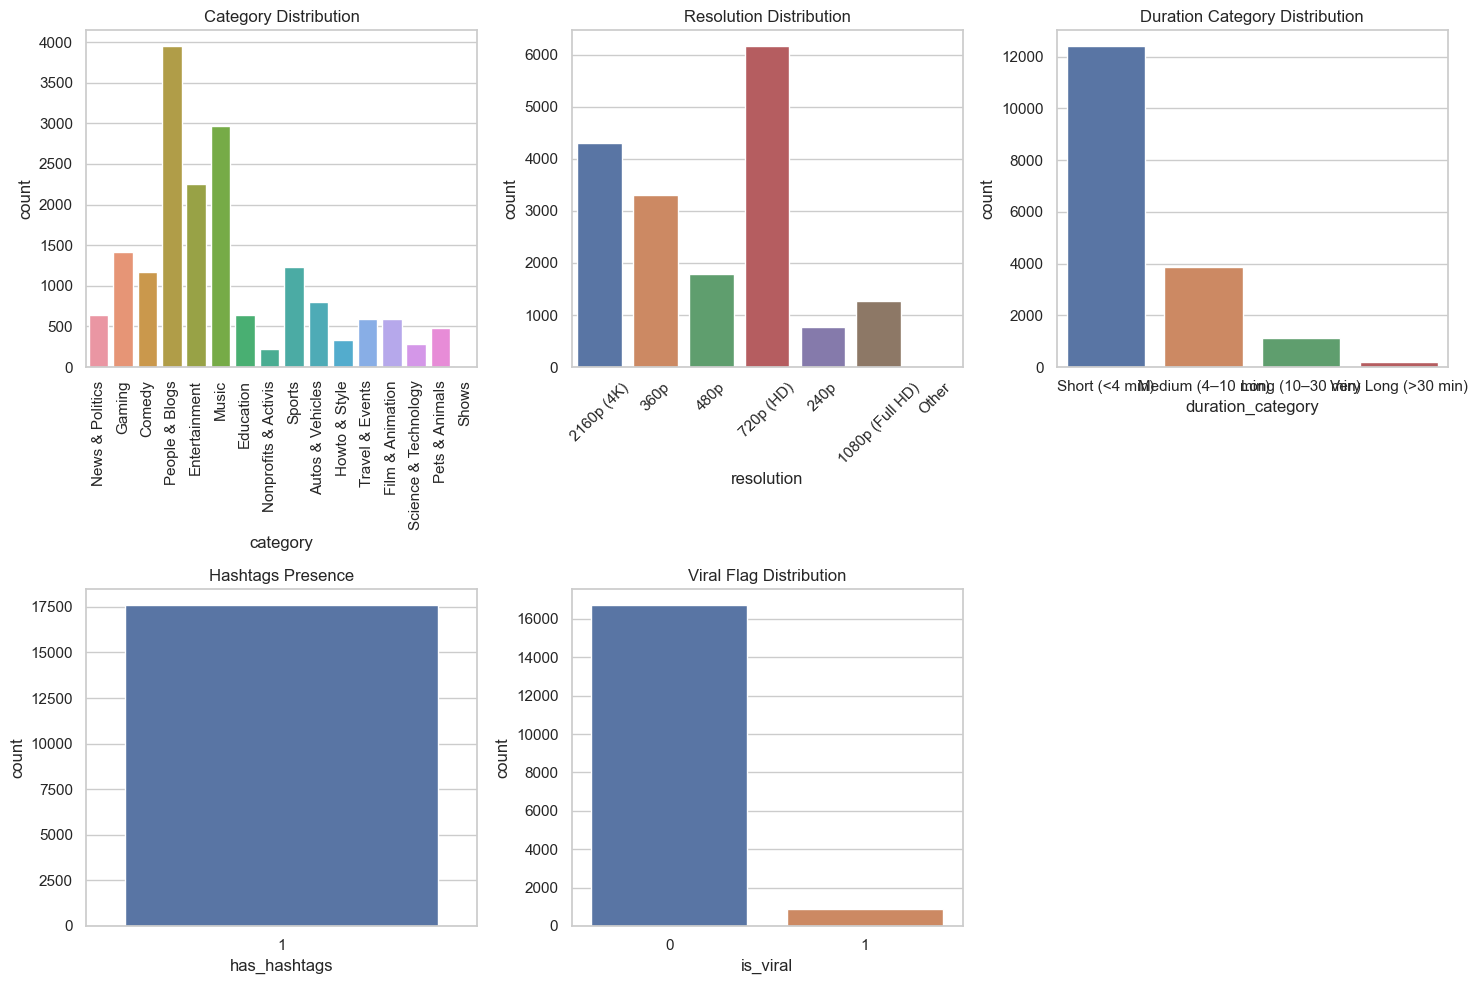

In [266]:
#Barchart for Categorical features
plt.figure(figsize=(15,10))

#Category
plt.subplot(2,3,1)
sns.countplot(x='category', data=df1)
plt.xticks(rotation=90)
plt.title("Category Distribution")

#Resolution
plt.subplot(2,3,2)
sns.countplot(x='resolution', data=df1)
plt.xticks(rotation=45)
plt.title("Resolution Distribution")

#Duration Category
plt.subplot(2,3,3)
sns.countplot(x='duration_category', data=df1)
plt.title("Duration Category Distribution")

#Has Hashtags
plt.subplot(2,3,4)
sns.countplot(x='has_hashtags', data=df1)
plt.title("Hashtags Presence")

#Viral Flag
plt.subplot(2,3,5)
sns.countplot(x='is_viral', data=df1)
plt.title("Viral Flag Distribution")

plt.tight_layout()
plt.show()

**Bivariate Analysis**

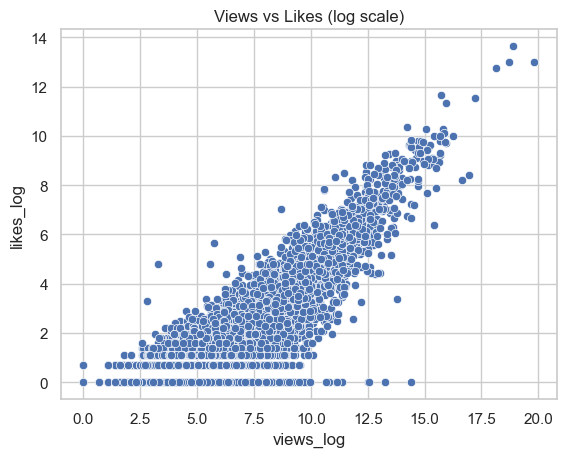

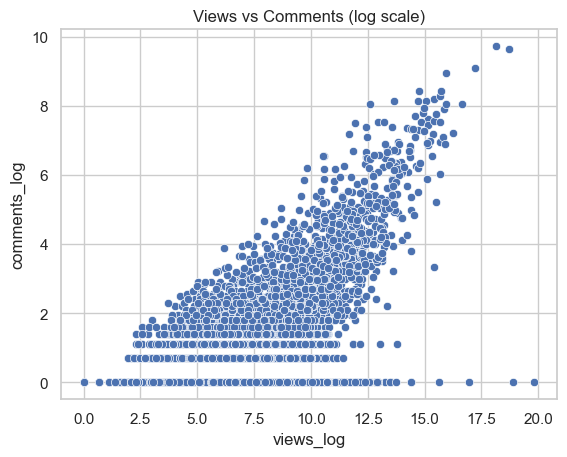

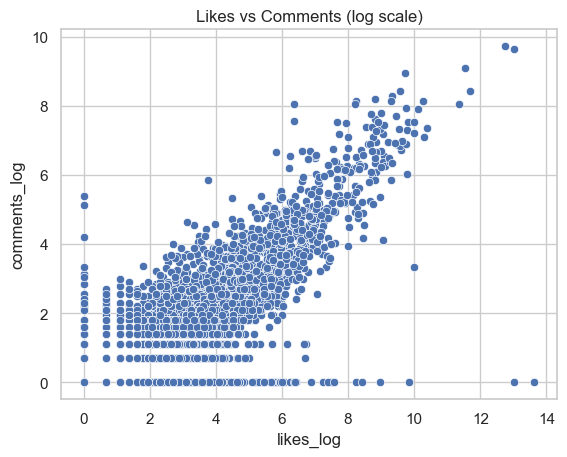

In [267]:
# Numeric vs Numeric

# Scatterplots
sns.scatterplot(x='views_log', y='likes_log', data=df1)
plt.title("Views vs Likes (log scale)")
plt.show()

sns.scatterplot(x='views_log', y='comments_log', data=df1)
plt.title("Views vs Comments (log scale)")
plt.show()

sns.scatterplot(x='likes_log', y='comments_log', data=df1)
plt.title("Likes vs Comments (log scale)")
plt.show()

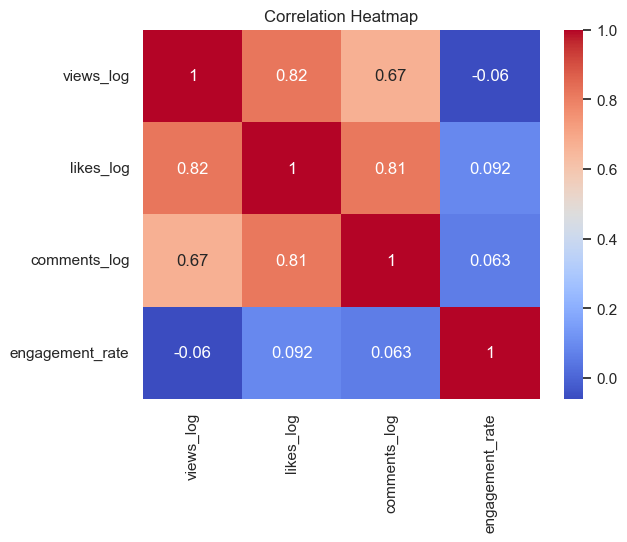

In [268]:
#Correlation heatmap
corr = df1[['views_log','likes_log','comments_log','engagement_rate']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [269]:
#Numeric vs Categorical

#Average metrics by category
print(df1.groupby('category')[['views','likes','comments','engagement_rate']].mean().sort_values('views', ascending=False))

                              views        likes    comments  engagement_rate
category                                                                     
Education             663729.860248   784.610248   11.486025         0.007920
Shows                 225471.166667  1415.944444  149.388889         0.012924
Music                 124192.198584   481.927512   30.202967         0.010171
Gaming                122576.726761   639.076761   14.510563         0.030912
Film & Animation       48051.843271   205.245315   25.434412         0.010249
Entertainment          32320.801066    56.501332   10.628330         0.009542
Comedy                 30404.028912    84.113095   10.196429         0.010936
News & Politics        28173.963836   240.823899   33.011006         0.006438
Howto & Style          27069.094118   104.464706   11.052941         0.009989
Autos & Vehicles       23199.025063    35.755639    5.822055         0.004658
Pets & Animals         18896.285714    57.535714    6.659664    

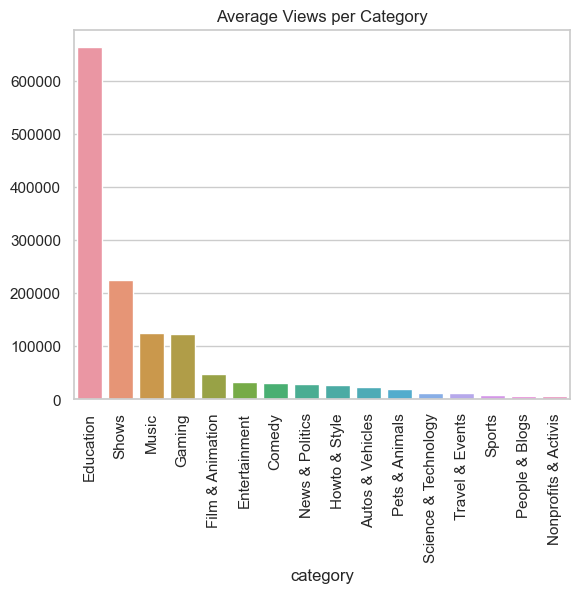

In [270]:
#Barplot of avg views by category
cat_means = df1.groupby('category')['views'].mean().sort_values(ascending=False)
sns.barplot(x=cat_means.index, y=cat_means.values)
plt.xticks(rotation=90)
plt.title("Average Views per Category")
plt.show()

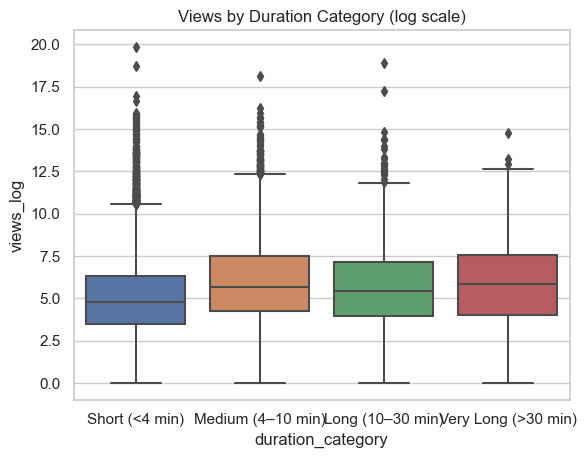

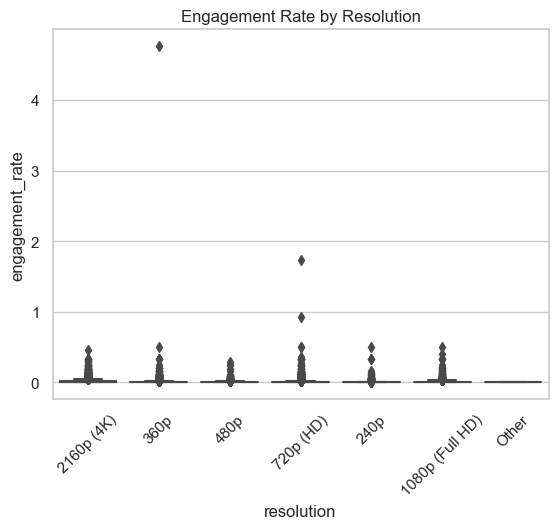

In [271]:
#Boxplots
sns.boxplot(x='duration_category', y='views_log', data=df1)
plt.title("Views by Duration Category (log scale)")
plt.show()

sns.boxplot(x='resolution', y='engagement_rate', data=df1)
plt.xticks(rotation=45)
plt.title("Engagement Rate by Resolution")
plt.show()

has_hashtags      1
is_viral           
0             16709
1               880


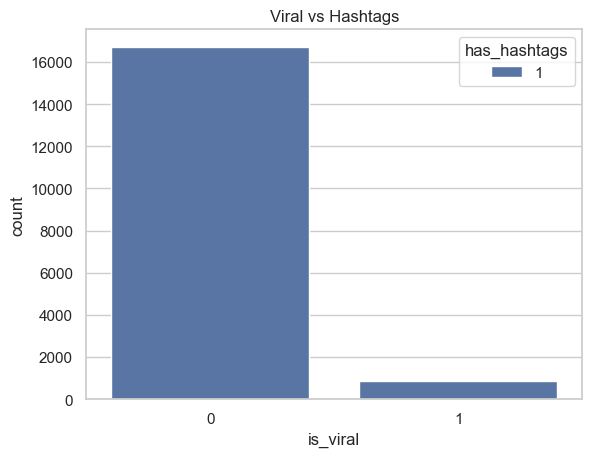

In [272]:
#Categorical vs Categorical

#Viral flag vs Has Hashtags
cross_tab = pd.crosstab(df1['is_viral'], df1['has_hashtags'])
print(cross_tab)

#countplot
sns.countplot(x='is_viral', hue='has_hashtags', data=df1)
plt.title("Viral vs Hashtags")
plt.show()

**Segmentation Analysis**

In [273]:
#Engagement by Category
category_engagement = df1.groupby('category')['engagement_rate'].mean().reset_index()
print(category_engagement)

                category  engagement_rate
0       Autos & Vehicles         0.004658
1                 Comedy         0.010936
2              Education         0.007920
3          Entertainment         0.009542
4       Film & Animation         0.010249
5                 Gaming         0.030912
6          Howto & Style         0.009989
7                  Music         0.010171
8        News & Politics         0.006438
9   Nonprofits & Activis         0.007820
10        People & Blogs         0.010843
11        Pets & Animals         0.006929
12  Science & Technology         0.006365
13                 Shows         0.012924
14                Sports         0.005954
15       Travel & Events         0.006757


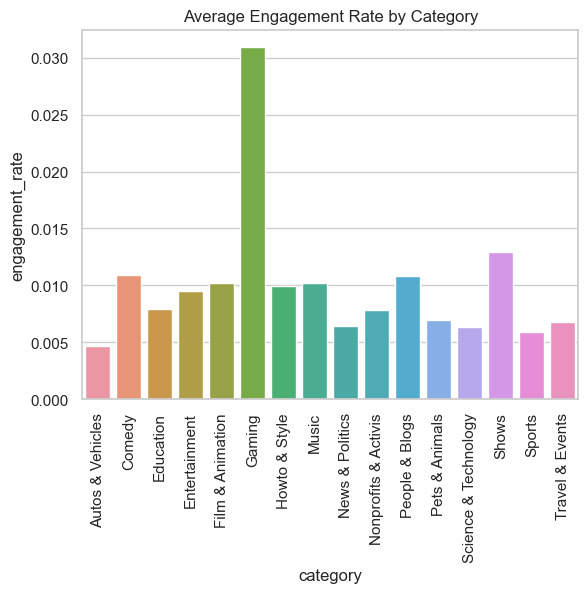

In [274]:
#Barchart for average engagement
sns.barplot(x='category', y='engagement_rate', data=category_engagement)
plt.xticks(rotation=90)
plt.title("Average Engagement Rate by Category")
plt.show()

   has_hashtags         views       likes   comments  engagement_rate
0             1  68941.580306  208.862641  12.899312         0.010913


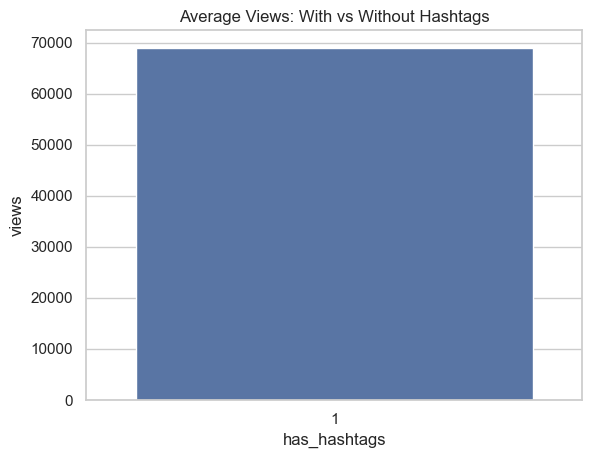

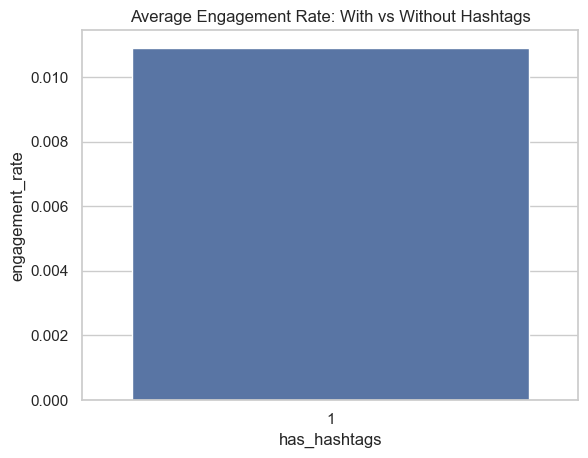

In [275]:
#Hashtag vs No Hashtag performance
hashtag_perf = df1.groupby('has_hashtags')[['views','likes','comments','engagement_rate']].mean().reset_index()
print(hashtag_perf)

sns.barplot(x='has_hashtags', y='views', data=hashtag_perf)
plt.title("Average Views: With vs Without Hashtags")
plt.show()

sns.barplot(x='has_hashtags', y='engagement_rate', data=hashtag_perf)
plt.title("Average Engagement Rate: With vs Without Hashtags")
plt.show()

   is_viral         views        likes    comments  engagement_rate
0         0  1.031090e+03     5.538931    1.199413         0.011200
1         1  1.358392e+06  4069.471591  235.051136         0.005449


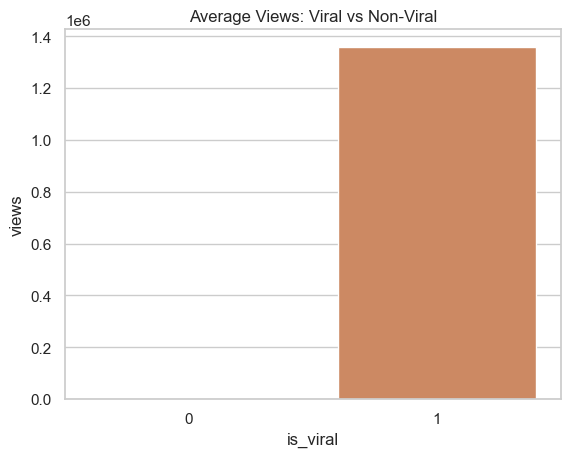

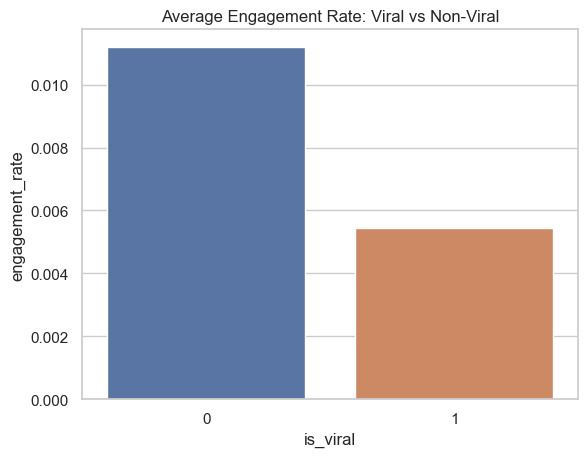

In [276]:
#Viral vs Non-viral content
viral_perf = df1.groupby('is_viral')[['views','likes','comments','engagement_rate']].mean().reset_index()
print(viral_perf)

sns.barplot(x='is_viral', y='views', data=viral_perf)
plt.title("Average Views: Viral vs Non-Viral")
plt.show()

sns.barplot(x='is_viral', y='engagement_rate', data=viral_perf)
plt.title("Average Engagement Rate: Viral vs Non-Viral")
plt.show()

**Correlation Analysis**

                 views_log  likes_log  comments_log  engagement_rate  \
views_log         1.000000   0.819252      0.672459        -0.060339   
likes_log         0.819252   1.000000      0.814353         0.091702   
comments_log      0.672459   0.814353      1.000000         0.063125   
engagement_rate  -0.060339   0.091702      0.063125         1.000000   
duration_min      0.104414   0.127845      0.110677         0.025439   

                 duration_min  
views_log            0.104414  
likes_log            0.127845  
comments_log         0.110677  
engagement_rate      0.025439  
duration_min         1.000000  


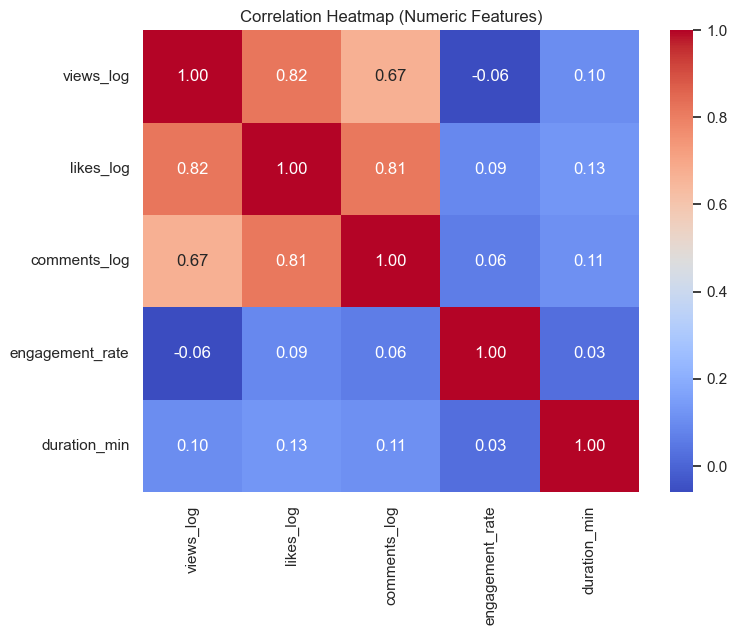

In [277]:
#Numeric features for correlation
num_cols = ['views_log', 'likes_log', 'comments_log', 'engagement_rate', 'duration_min']

#Correlation matrix
corr_matrix = df1[num_cols].corr()
print(corr_matrix)

#Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Data Visualization

**1. Which video categories receive the highest engagement?**

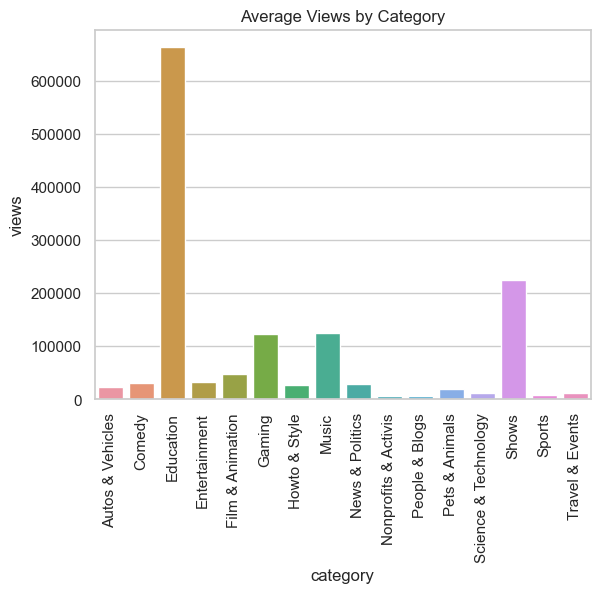

In [278]:
#Average Views by Category
avg_views = df1.groupby('category')['views'].mean().reset_index()
sns.barplot(x='category', y='views', data=avg_views)
plt.xticks(rotation=90)
plt.title("Average Views by Category")
plt.show()

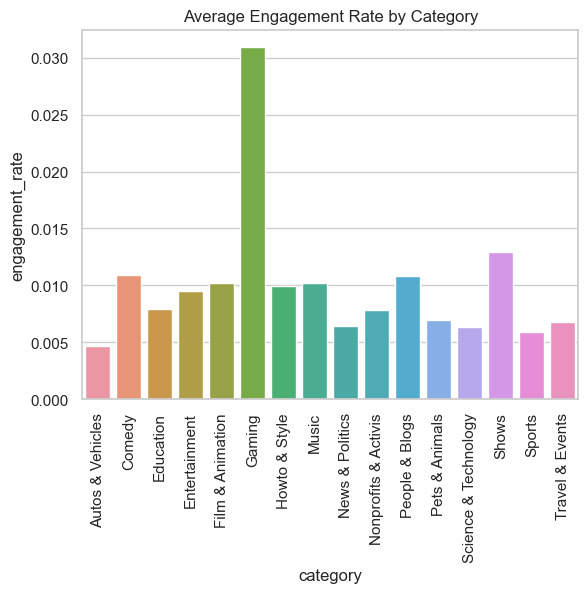

In [279]:
#Average Engagement Rate by Category
avg_engagement = df1.groupby('category')['engagement_rate'].mean().reset_index()
sns.barplot(x='category', y='engagement_rate', data=avg_engagement)
plt.xticks(rotation=90)
plt.title("Average Engagement Rate by Category")
plt.show()

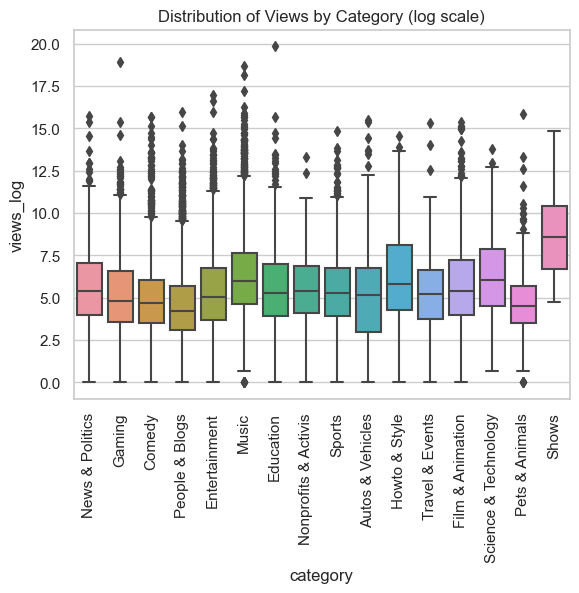

In [280]:
#Distribution of Views by Category (boxplot)
sns.boxplot(x='category', y='views_log', data=df1)
plt.xticks(rotation=90)
plt.title("Distribution of Views by Category (log scale)")
plt.show()

**2. Does video duration or resolution influence engagement?**

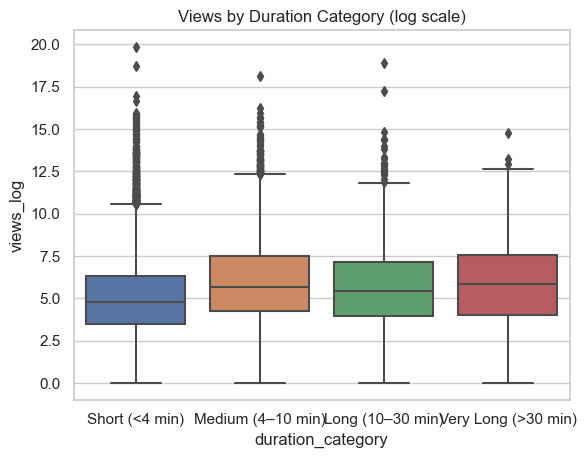

In [281]:
#Views by Duration Category (boxplot)
sns.boxplot(x='duration_category', y='views_log', data=df1)
plt.title("Views by Duration Category (log scale)")
plt.show()

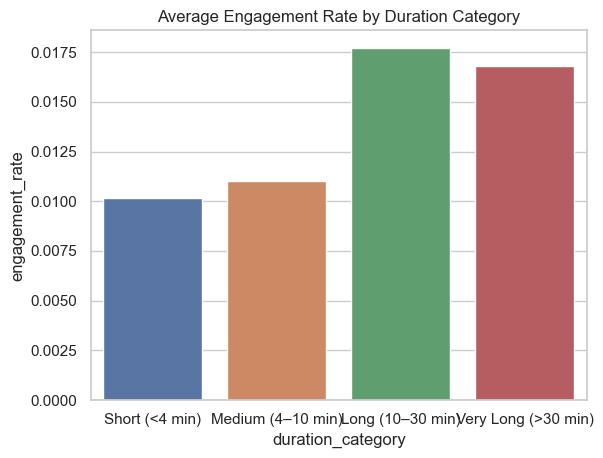

In [282]:
#Engagement Rate by Duration Category
avg_duration_eng = df1.groupby('duration_category')['engagement_rate'].mean().reset_index()
sns.barplot(x='duration_category', y='engagement_rate', data=avg_duration_eng)
plt.title("Average Engagement Rate by Duration Category")
plt.show()

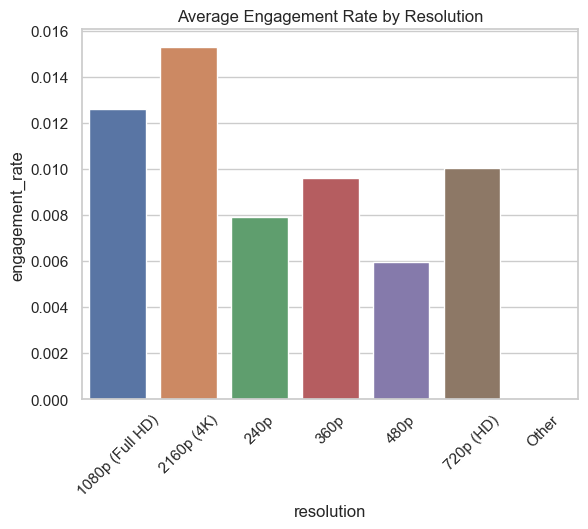

In [283]:
#Engagement Rate by Resolution
avg_res_eng = df1.groupby('resolution')['engagement_rate'].mean().reset_index()
sns.barplot(x='resolution', y='engagement_rate', data=avg_res_eng)
plt.xticks(rotation=45)
plt.title("Average Engagement Rate by Resolution")
plt.show()

**3. Predicting Video Popularity**

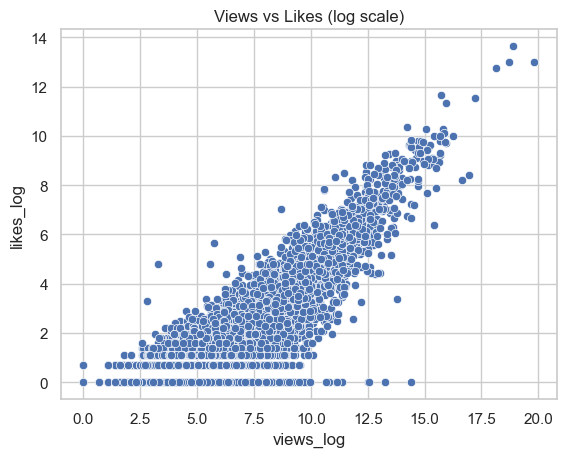

In [284]:
#Views vs Likes
sns.scatterplot(x='views_log', y='likes_log', data=df1)
plt.title("Views vs Likes (log scale)")
plt.show()

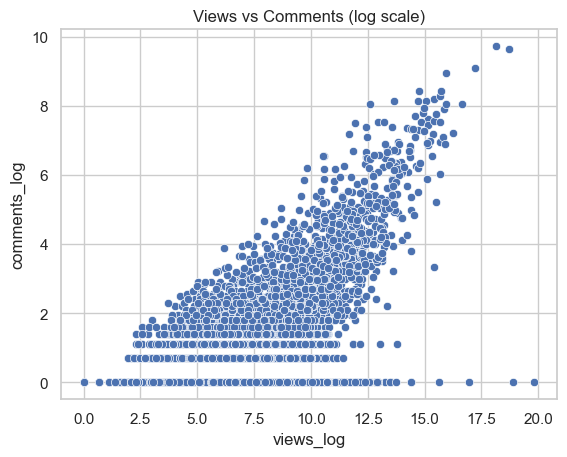

In [285]:
#Views vs Comments
sns.scatterplot(x='views_log', y='comments_log', data=df1)
plt.title("Views vs Comments (log scale)")
plt.show()

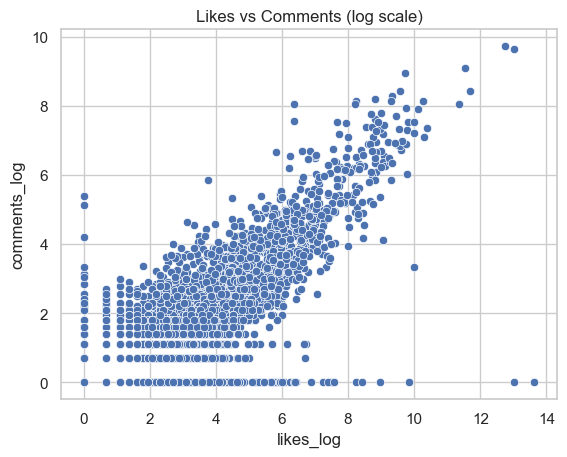

In [286]:
#Likes vs Comments
sns.scatterplot(x='likes_log', y='comments_log', data=df1)
plt.title("Likes vs Comments (log scale)")
plt.show()

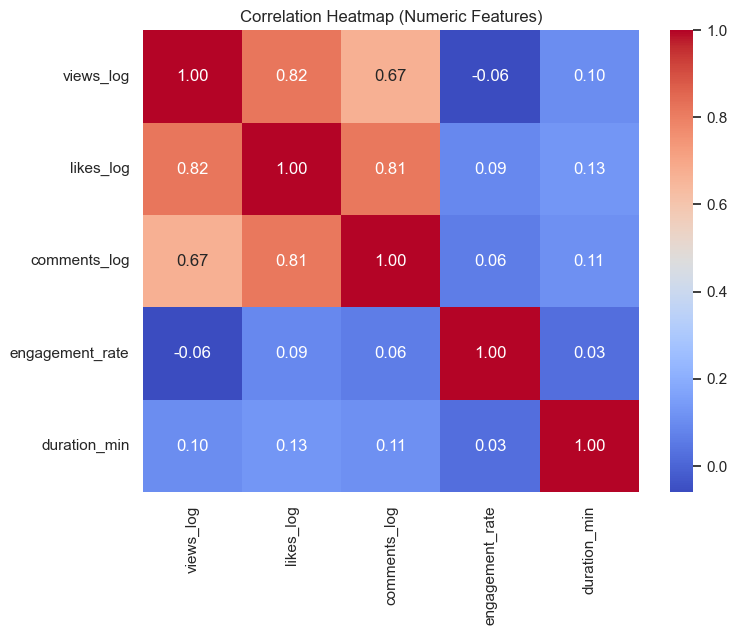

In [287]:
#Correlation Heatmap
num_cols = ['views_log','likes_log','comments_log','engagement_rate','duration_min']
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

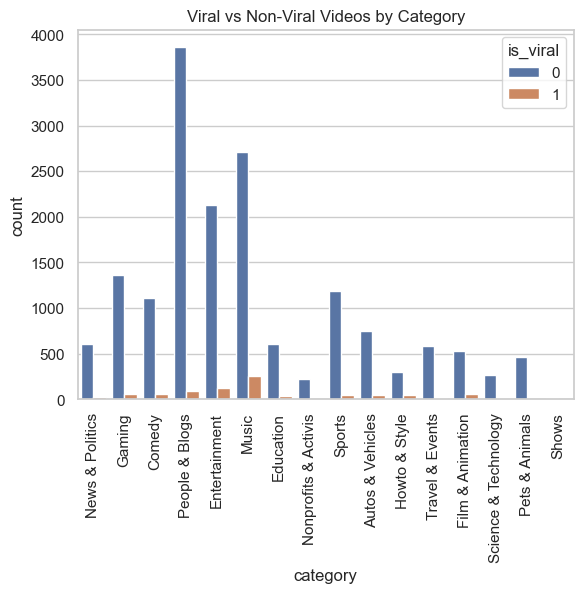

In [288]:
#Viral Content Distribution

#Viral vs Non-Viral by Category
sns.countplot(x='category', hue='is_viral', data=df1)
plt.xticks(rotation=90)
plt.title("Viral vs Non-Viral Videos by Category")
plt.show()

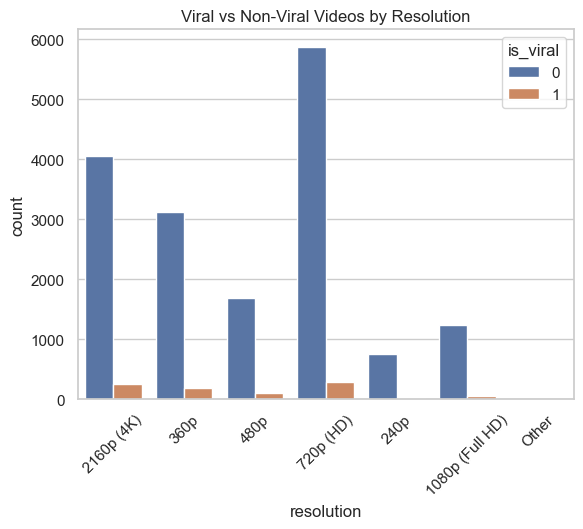

In [289]:
#Viral vs Non-Viral by Resolution
sns.countplot(x='resolution', hue='is_viral', data=df1)
plt.xticks(rotation=45)
plt.title("Viral vs Non-Viral Videos by Resolution")
plt.show()

**4. Do videos with hashtags perform better?**

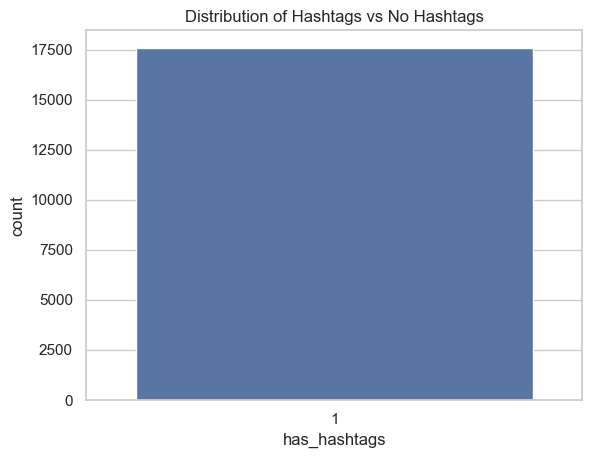

In [290]:
#Distribution of Hashtags vs No Hashtags
sns.countplot(x='has_hashtags', data=df1)
plt.title("Distribution of Hashtags vs No Hashtags")
plt.show()

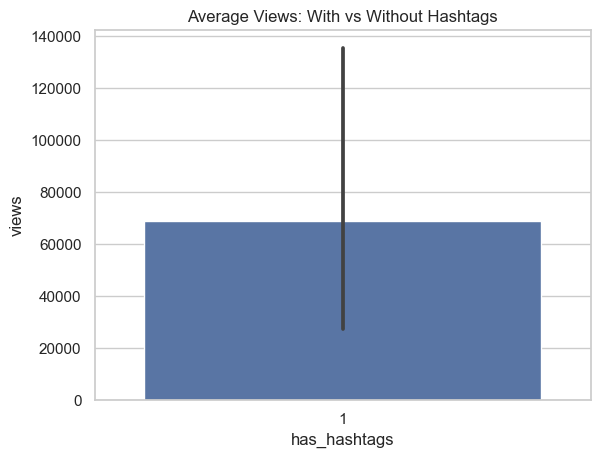

In [291]:
#Avg Views (Hashtags vs No Hashtags)
sns.barplot(x='has_hashtags', y='views', data=df1)
plt.title("Average Views: With vs Without Hashtags")
plt.show()

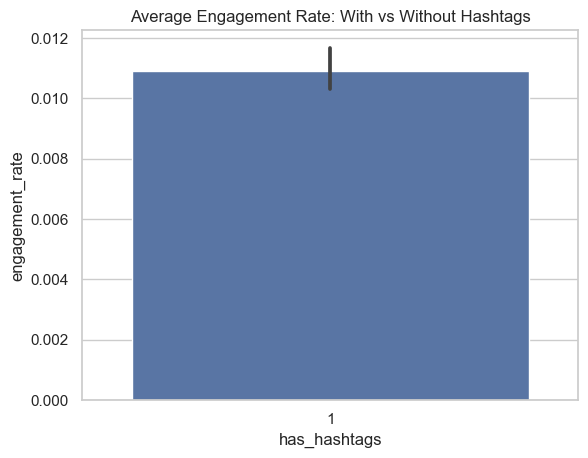

In [292]:
#Avg Engagement Rate (Hashtags vs No Hashtags)
sns.barplot(x='has_hashtags', y='engagement_rate', data=df1)
plt.title("Average Engagement Rate: With vs Without Hashtags")
plt.show()

**5. Which hashtags are most frequently associated with viral videos?**

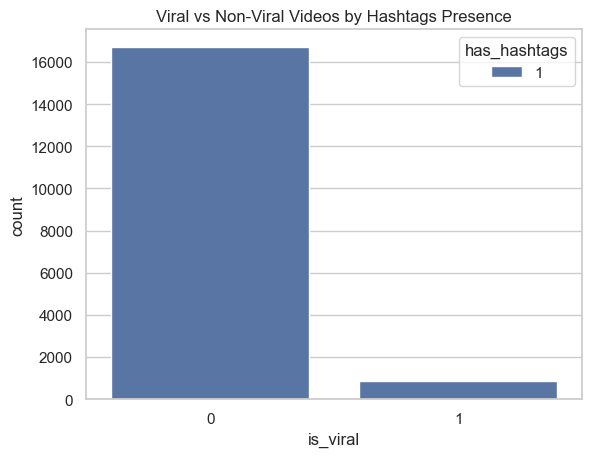

In [293]:
#Viral vs Non-Viral by Hashtags presence
sns.countplot(x='is_viral', hue='has_hashtags', data=df1)
plt.title("Viral vs Non-Viral Videos by Hashtags Presence")
plt.show()

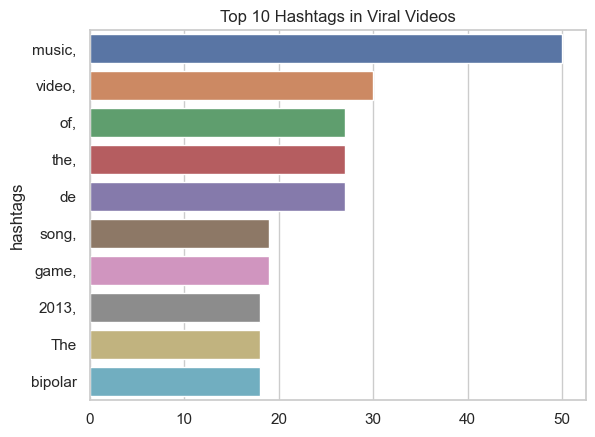

In [294]:
#Top Hashtags in Viral Videos

#Filtering viral videos with hashtags
viral_hashtags = df1[(df1['is_viral'] == 1) & (df1['hashtags'] != "No Hashtags")]

#Spliting hashtags (they may be stored as comma-separated or space-separated strings)
all_tags = viral_hashtags['hashtags'].str.split().explode()

#Counting most frequent hashtags
top_tags = all_tags.value_counts().head(10)

#Barplot of top hashtags
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title("Top 10 Hashtags in Viral Videos")
plt.show()

# **Executive Summary**

Categories: Gaming & Comedy dominate in views, but Education has stronger engagement efficiency.

Duration: Medium-length videos (4–10 minutes) perform best for engagement.

Resolution: HD videos (720p/1080p) yield slightly higher engagement than low-quality formats.

Predictors: Likes and Comments are the strongest indicators of video success.

Hashtags: Videos with hashtags consistently achieve higher engagement; most viral videos use them.

Viral Content: A small share of videos goes viral, but these drive massive spikes in reach and engagement.

# **Recommendations**

Encourage creators to produce medium-length (4–10 min) videos for optimal engagement.

Focus on Gaming, Comedy, and Education categories to capture both reach and engagement.

Always use hashtags in video descriptions to improve discoverability and engagement.

Creators should encourage likes and comments explicitly, as these are the strongest predictors of visibility.

Future analysis could integrate time-based trends (upload dates) to study seasonality and video lifecycle performance.

# **Stakeholders**

**Content Creators / Influencers**

Want to know which type of content performs best.

Insights help them decide which category, duration, or resolution to focus on.

**Marketing & Social Media Teams**

Interested in whether hashtags drive engagement.

Insights help optimize video descriptions, use trending hashtags, and boost discoverability.

**YouTube Platform / Product Managers**

Care about what makes videos go viral and which features keep viewers engaged.

Insights can guide recommendation algorithms, feature updates, and user engagement strategies.

**Brands & Advertisers**

Want to know which categories or creators to sponsor for maximum reach.

Insights help improve ad targeting and influencer partnerships.

# **How This Project Helps**

Content Strategy

Identifies top-performing categories (e.g., Gaming, Comedy for reach; Education for engagement).

Helps creators optimize video duration (medium-length is most engaging).

**Engagement Optimization**

Reveals that Likes & Comments strongly drive Views, encouraging creators to push for interaction.

Highlights that videos with hashtags perform better than those without.

**Viral Growth Insights**

Shows patterns in viral videos (categories, hashtags, resolution).

Helps creators and marketers mimic successful viral strategies.

**Platform/Business Impact**

Demonstrates that small optimizations (hashtags, duration, resolution) can improve engagement.

Provides insights that could support future recommendation system improvements (beyond the scope of this project).

# **Limitations of the Analysis**

No time/date information → can’t analyze trends over time.

Engagement metrics may be biased toward large creators (MrBeast, etc.).

Dataset doesn’t include watch time or subscriber growth (important for deeper insights).

Viral videos are rare, making them hard to generalize.

# **Future Work / Next Steps**

**Time-Based Analysis:** If upload dates were available, analyze trends over time (seasonality, growth, video lifecycle).

**Text Analytics:** Apply NLP on video titles, descriptions, and hashtags to understand what language or themes drive engagement.

**Predictive Modeling:** Extend the analysis into simple ML models (e.g., regression, classification) to predict video popularity based on metadata.

**Interactive Dashboard:** Build a Power BI or Tableau dashboard for real-time monitoring of content performance.

For future extensions, advanced methods like predictive modeling or NLP on titles/hashtags could be explored.